In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier 

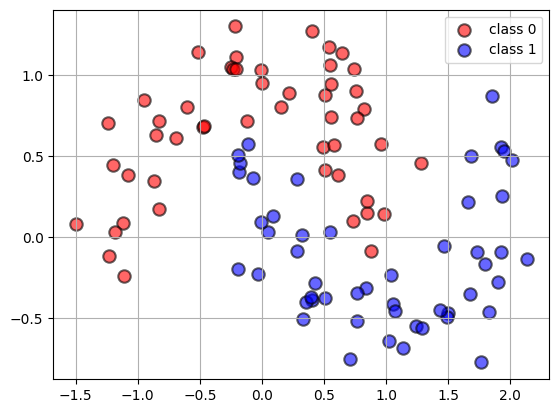

In [4]:
X,y = make_moons(100, noise=.2)
plt.scatter(X[:,0][y==0], X[:,1][y==0], color="red", label="class 0", alpha=.6, linewidths=1.5, edgecolors="black",s=80)
plt.scatter(X[:,0][y==1], X[:,1][y==1], color="blue", label="class 1", alpha=.6, linewidths=1.5, edgecolors="black",s=80)
plt.grid(); plt.legend();

In [14]:
# Create a decision tree classifier with a maximum depth of 3
dt = DecisionTreeClassifier(max_depth=3)

In [15]:
# Train the classifier using the feature matrix X and the target vector y
dt.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [16]:
# Evaluate the accuracy of the model on the training data
# This returns the proportion of correctly classified samples
dt.score(X, y)

0.9

In [17]:
# Predict the class label of a new sample with feature values [1, 0]
prediction = dt.predict([[1, 0]])


In [18]:
# Predict the class label of a new sample with feature values [0, -1]
dt.predict([[0,-1]])

array([1])

In [19]:
# Import the pickle module for object serialization
import pickle

# Save (serialize) the trained decision tree model 'dt' to a file named 'dtmodel.pckl'
# 'wb' means write in binary mode
pickle.dump(dt, open('dtmodel.pckl', 'wb'))

In [20]:
%%writefile server.py

# Import necessary libraries
from flask import Flask, request, redirect, url_for, flash, jsonify  # Flask web framework components
import pickle  # For loading the trained model
import json    # To handle JSON data
import numpy as np  # For numerical operations and array handling

# Create a Flask application instance
app = Flask(__name__)

# Define a route to handle POST requests at the '/predict' endpoint
@app.route('/predict', methods=['POST'])
def predict():
    # Receive and parse JSON data from the incoming request
    data = request.get_json()
    
    # Log the input for debugging purposes
    print("LOG: predicting on input", data)
    
    # Predict the output using the loaded model
    # The input 'data' must be a 2D list (e.g., [[1, 0]])
    prediction = np.array2string(model.predict(data))
    
    # Log the prediction result
    print("LOG: returning predictions", prediction)
    
    # Return the prediction as a JSON response
    return jsonify(prediction)

# Entry point of the application
if __name__ == '__main__':
    # Define the path to the trained model file
    modelfile = 'dtmodel.pckl'
    
    # Load the trained model using pickle
    model = pickle.load(open(modelfile, 'rb'))
    
    # Log the loaded model type for confirmation
    print("LOG: serving model", model.__class__.__name__)

     # Test the model with a sample input to ensure it's working
    test_input = [[1, 0]]
    test_prediction = model.predict(test_input)
    print("LOG: test prediction for input {} is {}".format(test_input, test_prediction))
   
    # Start the Flask development server on localhost, port 7766
    app.run(debug=True, host='127.0.0.1', port=7766)


Overwriting server.py


In [21]:
# Get the path to the current Python interpreter
import sys
e = sys.executable
e

'c:\\Users\\andre\\OneDrive\\Documentos\\Proyecto_Analitica_Data\\.venv\\Scripts\\python.exe'

In [3]:
pip = "/".join(e.split("/")[:-1])+"/pip"
!pip install flask


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", "flask"])

0

In [22]:
!$e server.py

^C
